<a href="https://colab.research.google.com/github/yubin8773/2021-deep-learning/blob/main/%EB%B0%B1%EC%B0%AC%ED%98%B8/Keras_5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#훈련 ,검증, 테스트 폴더로 이미지 복사하기
import os, shutil

#원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = '/content/drive/MyDrive/dataset/dogs-vs-cats/train'

#소규모 데이터셋을 저장할 디렉터리
base_dir = '/content/drive/MyDrive/dataset/dogs-vs-cats_small'
os.mkdir(base_dir)

#훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

#훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

#훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

#검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

#검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

#테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

#테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

#처음 1000개의 고양이 이미지를 train_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

#다음 500개의 고양이 이미지를 validation_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
#다음 500개의 고양이 이미지를 test_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
#처음 1000개의 강아지 이미지를 train_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
#다음 500개의 강아지 이미지를 validation_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
#다음 500개의 강아지 이미지를 test_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [3]:
print("훈련용 고양이 이미지 개수:", len(os.listdir(train_cats_dir)))
print("훈련용 강아지 이미지 개수:", len(os.listdir(train_dogs_dir)))
print("검증용 고양이 이미지 개수:", len(os.listdir(validation_cats_dir)))
print("검증용 강아지 이미지 개수:", len(os.listdir(validation_dogs_dir)))
print("테스트용 고양이 이미지 개수:", len(os.listdir(test_cats_dir)))
print("테스트용 강아지 이미지 개수:", len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 개수: 1000
훈련용 강아지 이미지 개수: 1000
검증용 고양이 이미지 개수: 500
검증용 강아지 이미지 개수: 500
테스트용 고양이 이미지 개수: 500
테스트용 강아지 이미지 개수: 500


In [4]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', 
                        input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [6]:
from keras import optimizers

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


사진 파일을 읽고 JPEG 콘텐츠를 RGB픽셀 값으로 디코딩한 후 부동소수 타입의 텐서로 변환한다. 그 다음 픽셀값의(0~255사이) 스케일을 [0,1] 사이로 조정한다.

=>복잡해 보이지만 케라스에는 이를 위한 유틸리티가 있고 ImageDataGenerator를 사용할 수도 있다

In [7]:
#ImageDataGenerator를 이용해 디렉터리에서 이미지 읽기
from keras.preprocessing.image import ImageDataGenerator

#모든 이미지를 1/255로 스케일 조정한다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), #모든 이미지를 150x150크기로 바꾼다
    batch_size=20, class_mode = 'binary') #binary_crossentropy를 사용하기에 이진 레이블 필요

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150), 
    batch_size = 20, 
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [9]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100, 
    epochs=30, 
    validation_data=validation_generator, 
    validation_steps=50)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 56s 128ms/step - loss: 0.6977 - acc: 0.5318 - val_loss: 0.6759 - val_acc: 0.5160
Epoch 2/30
100/100 [==============================] - 12s 124ms/step - loss: 0.6665 - acc: 0.5940 - val_loss: 0.6925 - val_acc: 0.5390
Epoch 3/30
100/100 [==============================] - 12s 116ms/step - loss: 0.6066 - acc: 0.6789 - val_loss: 0.6059 - val_acc: 0.6690
Epoch 4/30
100/100 [==============================] - 12s 123ms/step - loss: 0.5713 - acc: 0.7099 - val_loss: 0.5934 - val_acc: 0.6720
Epoch 5/30
100/100 [==============================] - 12s 120ms/step - loss: 0.5434 - acc: 0.7165 - val_loss: 0.5823 - val_acc: 0.6920
Epoch 6/30
100/100 [==============================] - 13s 132ms/step - loss: 0.5092 - acc: 0.7442 - val_loss: 0.5859 - val_acc: 0.6790
Epoch 7/30
100/100 [==============================] - 12s 120ms/step - loss: 0.4857 - acc: 0.7643 - val_loss: 0.5705 - val_acc: 0.6950
Epoch 8/30
100/100 [==============================] - 1

In [10]:
#모델 저장하기
model.save('cats_and_dogs_small_1.h5')

<function matplotlib.pyplot.show>

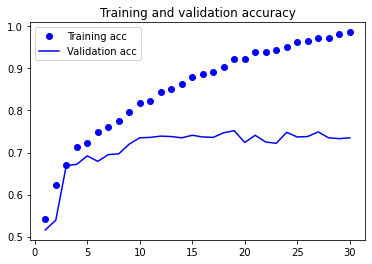

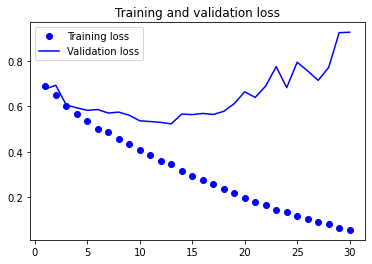

In [11]:
#훈련정확도와 손실 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show

In [12]:
#imageDataGenerator를 사용해 데이터 증식 설정
datagen = ImageDataGenerator(rotation_range=20, 
                             width_shift_range=0.1, 
                             height_shift_range=0.1, 
                             shear_range=0.1, 
                             zoom_range=0.1, 
                             horizontal_flip=True, 
                             fill_mode='nearest')

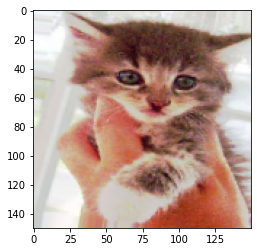

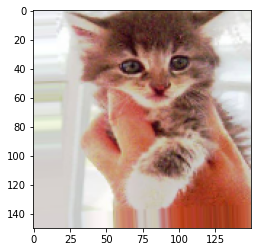

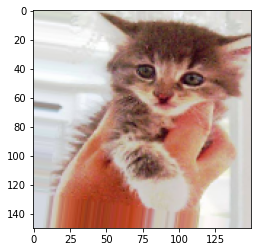

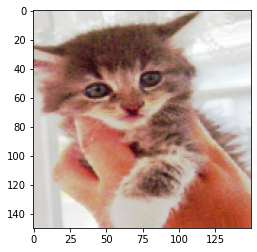

In [13]:
#랜덤하게 증식된 훈련 이미지 그리기
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for
                fname in os.listdir(train_cats_dir)])
img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break
plt.show()

In [14]:
#드롭아웃을 포함한 새로운 컨브넷 정의
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', 
                        input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [15]:
#데이터 증식 제너레이터를 이용해 컨브넷 훈련
train_datagen = ImageDataGenerator( 
    rescale = 1./255, 
    rotation_range = 40, 
    width_shift_range = 0.2, 
    height_shift_range = 0.2, 
    shear_range = 0.2, 
    zoom_range = 0.2, 
    horizontal_flip = True,)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size = (150, 150), 
    batch_size = 32, 
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size = (150, 150), 
    batch_size = 32, 
    class_mode = 'binary')

history = model.fit_generator(
    train_generator, 
    steps_per_epoch=train_generator.n//train_generator.batch_size, 
    epochs = 100, 
    validation_data = validation_generator, 
    validation_steps=validation_generator.n//validation_generator.batch_size)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
62/62 [==============================] - 24s 354ms/step - loss: 0.6985 - acc: 0.5197 - val_loss: 0.6860 - val_acc: 0.5363
Epoch 2/100
62/62 [==============================] - 22s 354ms/step - loss: 0.6895 - acc: 0.5367 - val_loss: 0.6771 - val_acc: 0.5786
Epoch 3/100
62/62 [==============================] - 22s 350ms/step - loss: 0.6857 - acc: 0.5356 - val_loss: 0.6739 - val_acc: 0.5343
Epoch 4/100
62/62 [==============================] - 21s 343ms/step - loss: 0.6774 - acc: 0.5688 - val_loss: 0.6634 - val_acc: 0.5766
Epoch 5/100
62/62 [==============================] - 20s 319ms/step - loss: 0.6738 - acc: 0.5833 - val_loss: 0.6805 - val_acc: 0.5615
Epoch 6/100
62/62 [==============================] - 21s 346ms/step - loss: 0.6586 - acc: 0.5929 - val_loss: 0.6402 - val_acc: 0.6552
Epoch 7/100
62/62 [==============================] - 20s 324ms/step - loss: 0.6535 - acc: 0.5995 - val_loss: 0.6297 - val_acc: 0.6623
Epoch 8/100
62/62 [==============================] - 21s 347ms

In [16]:
model.save('cats_and_dogs_small_2.h5')

<function matplotlib.pyplot.show>

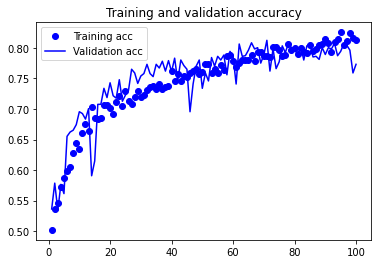

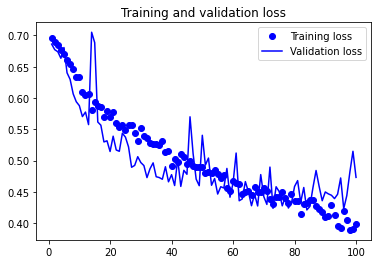

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show

작은 이미지 데이터셋에 딥러닝을 적용하는 일반적이고 효과적인 방법은 사전 훈련된 네트워크를 사용하는 것이다. 사전 훈련된 네트워크를 사용하는 것에믄 특성 추출과 미세조정 두 가지 방법이 있다.

In [35]:
#VGG16합성곱 기반 층 만들기
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet', 
                  include_top=False, 
                  input_shape=(150,150, 3))

In [33]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [42]:
#데이터 증식을 사용하지 않는 빠른 특성추출-사전훈련된 합성곱 기반 층을 사용한 특성추출
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/dataset/dogs-vs-cats_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size=20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory, 
      target_size=(150,150), 
      batch_size=batch_size, 
      class_mode='binary')
  i=0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i*batch_size : (i+1)*batch_size] = features_batch
    labels[i*batch_size : (i+1)*batch_size] = labels_batch
    i+=1
    if i*batch_size>=sample_count:
      break
  return features, labels_batch

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [44]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [45]:
#완전 연결 분류기를 정의하고 훈련하기
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(train_features, train_labels, 
                    epochs=30, 
                    batch_size=20, 
                    validation_data=(validation_features, validation_labels))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


ValueError: ignored